In [9]:
import librosa
import soundfile as sf
import IPython.display as ipd

audio_path = r"C:\Users\Admin\Downloads\Recording.wav"
y, sr = librosa.load(audio_path, sr=None)

y_trim, _ = librosa.effects.trim(y)
trimmed_audio_path = "trimmed_speech.wav"
sf.write(trimmed_audio_path, y_trim, sr)

original_audio, _ = librosa.load(audio_path, sr=None)
trimmed_audio, _ = librosa.load(trimmed_audio_path, sr=None)

print("Original Audio:")
ipd.display(ipd.Audio(original_audio, rate=sr))

print("Trimmed Audio:")
ipd.display(ipd.Audio(trimmed_audio, rate=sr))

Original Audio:


Trimmed Audio:


In [10]:
import librosa
import soundfile as sf
import IPython.display as ipd

audio_path = r"C:\Users\Admin\Downloads\Recording.wav"
y, sr = librosa.load(audio_path, sr=None)

# Split the audio based on detected silences
split_intervals = librosa.effects.split(y, top_db=30)  # Adjust top_db as needed

# Save each split interval as a separate audio file and display
for i, (start, end) in enumerate(split_intervals):
    split_audio = y[start:end]
    split_audio_path = f"split_{i}.wav"
    sf.write(split_audio_path, split_audio, sr)
    split_audio, _ = librosa.load(split_audio_path, sr=None)
    print(f"Split Audio {i}:")
    ipd.display(ipd.Audio(split_audio, rate=sr))


Split Audio 0:


Split Audio 1:


In [11]:
import numpy as np
import statistics
import matplotlib.pyplot as plt

def calculate_continuous_average_energy(y, N):
    """Calculate continuous average energy."""
    Ek = []
    for k in range(len(y) - N + 1):
        sum_energy = sum([y[i] * y[i] for i in range(k, N + k)])
        Ek.append((1 / N) * sum_energy)
    return np.array(Ek)

def normalize_energy(Ek_arr):
    """Normalize energy using mean and variance."""
    mean = statistics.mean(Ek_arr)
    var = statistics.variance(Ek_arr)
    Em = [(Ek_arr[i] - mean) / var for i in range(len(Ek_arr))]
    return np.array(Em)

def plot_energy_and_zero_crossings(Ek_arr, zero_crossings):
    """Plot continuous average energy and zero crossings."""
    plt.figure(figsize=(14, 5))
    plt.subplot(2, 1, 1)
    plt.plot(Ek_arr, color='blue')
    plt.title('Continuous Average Energy')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    # Plot the zero crossings
    plt.subplot(2, 1, 2)
    plt.plot(zero_crossings, color='r')
    plt.title('Zero Crossings')
    plt.xlabel('Sample Index')
    plt.ylabel('Zero Crossing')
    plt.tight_layout()
    plt.show()
def detect_lobe_maxima(Em_arr):
        """Detect lobe maxima and boundaries."""
        zero_crossings_Energy = np.where(np.diff(np.sign(Em_arr)))[0]
        lobe_maxima_indices = []
        lobe_boundaries = []

        for i in range(len(zero_crossings_Energy) - 1):
            lobe_start = zero_crossings_Energy[i]
            lobe_end = zero_crossings_Energy[i + 1]

            lobe_max_index = lobe_start + np.argmax(Em_arr[lobe_start:lobe_end])
            lobe_maxima_indices.append(lobe_max_index)
            lobe_boundaries.append((lobe_start, lobe_end))

        return lobe_maxima_indices, lobe_boundaries

def plot_with_lobe_maxima(y, sr, lobe_maxima_indices, lobe_boundaries):
    """Plot audio signal with lobe maxima and boundaries."""
    plt.figure(figsize=(10, 6))
    plt.plot(y, alpha=0.5, color='blue')

    lobe_maxima_times = librosa.samples_to_time(lobe_maxima_indices, sr=sr)
    lobe_boundaries_times = librosa.samples_to_time(np.array(lobe_boundaries).flatten(), sr=sr)

    plt.scatter(lobe_maxima_times, y[lobe_maxima_indices], color='r', label='Lobe Maxima')

    for start, end in zip(lobe_boundaries_times[::2], lobe_boundaries_times[1::2]):
        plt.axvline(x=start, color='g', linestyle='--', alpha=0.5)
        plt.axvline(x=end, color='g', linestyle='--', alpha=0.5)

    plt.title('Audio Signal with Lobe Maxima and Boundaries')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

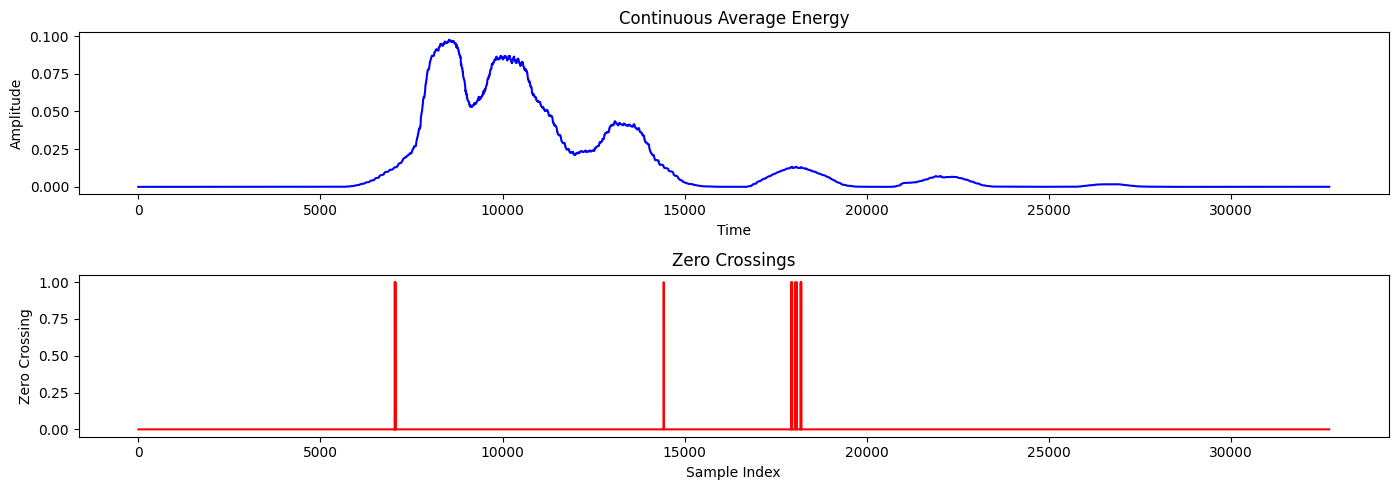

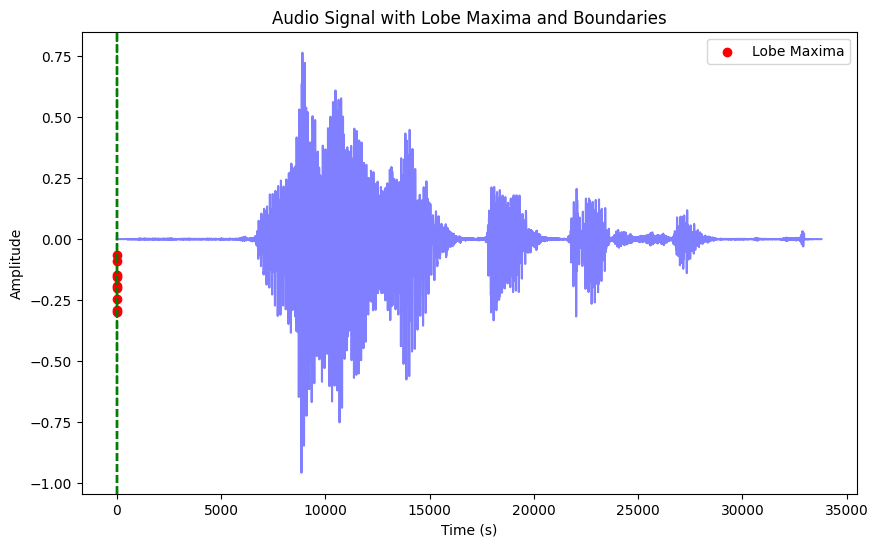

In [12]:
N = 1102
Ek_arr = calculate_continuous_average_energy(y, N)

    # Normalize energy
Em_arr = normalize_energy(Ek_arr)

    # Plot energy and zero crossings
zero_crossings = librosa.zero_crossings(Em_arr, pad=False)
plot_energy_and_zero_crossings(Ek_arr, zero_crossings)

    # Detect lobe maxima and boundaries
lobe_maxima_indices, lobe_boundaries = detect_lobe_maxima(Em_arr)

    # Plot audio signal with lobe maxima and boundaries
plot_with_lobe_maxima(y, sr, lobe_maxima_indices, lobe_boundaries)